## **Deep Learning Credit Scoring with TensorFlow**

This project is divided into two parts. In the first part, I will explore **TensorFlow**, a deep learning framework, to build my own **Neural Networks** from scratch. In the second part, I will apply the skills acquired in the first part to **develop and train a neural network** that predicts a person's **credit score**.


This project aims to build a strong foundation in TensorFlow by learning essential deep learning techniques, including variable initialization, session management, and algorithm training, which are crucial for developing and optimizing neural networks.

**What is TensorFlow?**
TensorFlow is an open-source deep learning framework developed by Google. It helps build, train, and deploy machine learning (ML) and deep learning models efficiently. It supports both CPU and GPU processing, making it scalable for small and large projects.

**Why is TensorFlow Important for Data Analytics?**
- Predictive Analytics – Helps analyze trends and make forecasts using deep learning.
- Automated Insights – Can detect patterns in data that traditional analytics might miss.
- Scalability – Handles large datasets efficiently, useful for big data analysis.
- Integration – Works with tools like Python, SQL, and Power BI to enhance analytical workflows.
  
*Note: TensorFlow can be valuable for advanced analytics, forecasting, and automation, making you a more competitive analyst.*

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.python.framework import ops

%matplotlib inline
np.random.seed(1)

Now that I have imported the library, I will explore its various applications. I will begin with an example by computing the squared error loss.

$$
\text{loss} = \mathcal{L}(\hat{y}, y) = (\hat{y}^{(i)} - y^{(i)})^2
$$


In [2]:
import tensorflow as tf

# Disable Eager Execution (for TensorFlow 1.x behavior)
tf.compat.v1.disable_eager_execution()

# Define y_hat and y
y_hat = tf.constant(36, name='y_hat')
y = tf.constant(39, name='y')

# Define the loss variable
loss = tf.Variable((y - y_hat) ** 2, name='loss')

# Initialize variables
init = tf.compat.v1.global_variables_initializer()

# Create a session and run the computation
with tf.compat.v1.Session() as session:
    session.run(init)
    print(session.run(loss))


9



- Create Tensors (variables): Define the tensors without immediately executing or evaluating them.
- Define operations: Specify mathematical operations between the tensors.
- Initialize the tensors: Prepare the tensors for computation.
- Create a session: Establish a session to manage execution.
- Run the session: Execute the defined operations within the session.
                                             
*When I created a variable for the loss, I defined it as a function of other quantities without evaluating its value. To compute it, I initialized the variable using init = tf.global_variables_initializer(). This step ensured that the loss variable was properly set up, allowing me to evaluate and print its value in the final step.*

In [3]:
a = tf.constant(2)
b = tf.constant(10)
c = tf.multiply(a,b)
print(c)

Tensor("Mul:0", shape=(), dtype=int32)


In [4]:
import tensorflow as tf

# Disable Eager Execution (Make TensorFlow 2.x behave like TensorFlow 1.x)
tf.compat.v1.disable_eager_execution()

# Define constants
a = tf.constant(2)
b = tf.constant(10)

# Perform multiplication
c = tf.multiply(a, b)

# Create a Session (Using TF 1.x style)
with tf.compat.v1.Session() as sess:
    print(sess.run(c))


20


To summarize, always remember to initialize your variables, create a session, and execute operations within the session.

Next, it's important to understand placeholders. A placeholder is a tensor whose value is assigned later during execution. To provide a value for a placeholder, you use a feed dictionary (feed_dict). In the example below, we define a placeholder for x, allowing us to specify its value dynamically when running the session.

In [5]:
import tensorflow as tf

# Disable Eager Execution (Make TensorFlow 2.x behave like TensorFlow 1.x)
tf.compat.v1.disable_eager_execution()

# Define a placeholder (TF 1.x style)
x = tf.compat.v1.placeholder(tf.int64, name='x')

# Create a session and run computation
with tf.compat.v1.Session() as sess:
    print(sess.run(2 * x, feed_dict={x: 3}))  # Output: 6


6


A placeholder is a variable that receives its value later, during session execution. This process is known as feeding data into placeholders at runtime.

**Analysis:**
When defining operations in TensorFlow, I am constructing a computation graph, which represents the sequence of calculations. This graph may include placeholders, whose values are assigned dynamically during execution. When the session runs, TensorFlow processes the computation graph and evaluates the necessary operations using the provided data.

### **1.0 Logit Calculation**

I started this exercise by computing the following equation:  

$ Y = \mathbf{W} \mathbf{X} + \mathbf{b} $  

where **$\mathbf{W}$** and **$\mathbf{X}$** are random matrices, and **$\mathbf{b}$** is a random vector.  

Below are examples of the functions I needing, to complete this exercise.


In [6]:
# Random vector
np.random.randn(4)

array([ 1.62434536, -0.61175641, -0.52817175, -1.07296862])

In [7]:
# Random Matrix
np.random.randn(2,3)

array([[ 0.86540763, -2.3015387 ,  1.74481176],
       [-0.7612069 ,  0.3190391 , -0.24937038]])

In [8]:
# Addition with tensorflow
x1 = tf.constant(5, name="x1")
x2 = tf.constant(15, name="x2")
operation = tf.add(x1,x2)
with tf.compat.v1.Session() as sess:
    result = sess.run(operation)
print(result)

20


In [9]:
# Matrix Multiplication: Shapes (2,1), (1,2)
x1 = tf.constant([[2],[1]], name="x1")
x2 = tf.constant([[2,1]], name="x2")
operation = tf.matmul(x1,x2)
with tf.compat.v1.Session() as sess:
    result = sess.run(operation)
print(result)

[[4 2]
 [2 1]]


#### **Exercise 1.**

Compute $ W X + b $ where **$ W $**, **$ X $**, and **$ b $** are drawn from a random normal distribution.  
$ W $ has a shape of **(4,3)**, $ X $ is **(3,1)**, and $ b $ is **(4,1)**.  

As an example, here is how you would define a constant $ X $ with shape **(3,1)**:

```python
X = tf.constant(np.random.randn(3,1), name="X")


In [10]:
import tensorflow as tf
import numpy as np

# Disable Eager Execution (Make TensorFlow 2.x behave like TensorFlow 1.x)
tf.compat.v1.disable_eager_execution()

# Define the function to compute logits
def compute_logits():
    """
    Implements a linear function: Y = WX + b
    - Initializes W as a random tensor of shape (4,3)
    - Initializes X as a random tensor of shape (3,1)
    - Initializes b as a random tensor of shape (4,1)
    Returns:
    - result: Computed value of Y = WX + b
    """
    
    np.random.seed(1)  # Set seed for reproducibility

    # Define random tensors
    W = tf.constant(np.random.randn(4,3), name="W")
    X = tf.constant(np.random.randn(3,1), name="X")
    b = tf.constant(np.random.randn(4,1), name="b")

    # Compute Y = WX + b
    result = tf.add(tf.matmul(W, X), b)

    # Create a session and run the computation
    with tf.compat.v1.Session() as sess:
        sess.run(tf.compat.v1.global_variables_initializer())  # Initialize variables
        return sess.run(result)

# Run function and print result
print("result = \n", compute_logits())



result = 
 [[-1.98748544]
 [-2.76826248]
 [-0.78635415]
 [-2.77463846]]


### **1.1 Computing the sigmoid function**

I just implemented a linear function. TensorFlow offers a variety of commonly used neural network functions like `tf.sigmoid` and `tf.nn.relu`. For this exercise, I will compute the sigmoid function of an input.

In this exercise:
1. **Create a placeholder** $ x $.
2. **Define the operations** needed to compute the sigmoid using `tf.sigmoid`.
3. **Run the session**.

---

#### **Exercise 2.**
**Implement the Sigmoid Function**
You should use the following:
- `tf.placeholder(tf.float32, name = "...")`
- `tf.sigmoid(...)`
- `sess.run(..., feed_dict = {x: z})`

---

**TensorFlow Session Methods**
There are two typical ways to create and use sessions in TensorFlow:

**Method 1**
```python
sess = tf.Session()
# Run the variables initialization (if needed), run the operations
result = sess.run(..., feed_dict = {...})
sess.close() # Close the session

**Method 2**
```python 
with tf.Session() as sess:
    # Run the variables initialization (if needed), run the operations
    result = sess.run(..., feed_dict = {...})
    # This takes care of closing the session for you :)

In [11]:
import tensorflow

In [12]:
def sigmoid(z):
    """
    Computes the sigmoid of z
    
    Arguments:
    z -- input value, scalar or vector
    
    Returns: 
    results -- the sigmoid of z
    """
    
    # Create a placeholder for x. Name it 'x'.
    x = tf.placeholder(tf.float32, name="x")

    # compute sigmoid(x)
    sigmoid = tf.sigmoid(x)

    # Create a session, and run it. Please use the method 2 explained above. 
    # You should use a feed_dict to pass z's value to x. 
    with tf.Session() as sess:
        # Run session and call the output "result"
        result = sess.run(sigmoid, feed_dict={x:z})

    
    return result

In [15]:
print ("sigmoid(0) = " + str(sigmoid(0)))
print ("sigmoid(12) = " + str(sigmoid(12)))

sigmoid(0) = Tensor("Sigmoid_1:0", shape=(), dtype=float32)
sigmoid(12) = Tensor("Sigmoid_2:0", shape=(), dtype=float32)


### **1.2 Computing the Cost**

#### **Exercise 3.**
**Implement the Mean Squared Loss**
The **mean squared loss (MSE)** is the loss function used in **regression problems**. Your task is to compute the cost of the **Mean Squared Error (MSE)**.

The function you will use is:

```python
tf.reduce_mean(tf.square(prediction - label))


In [16]:
import tensorflow as tf
import numpy as np

# Disable Eager Execution (Make TensorFlow 2.x behave like TensorFlow 1.x)
tf.compat.v1.disable_eager_execution()

def cost():
    """
    Computes the cost using MSE (Mean Squared Error)
    """
    # Define placeholders (TF 1.x style)
    z = tf.compat.v1.placeholder(tf.float32, name="z")
    y = tf.compat.v1.placeholder(tf.float32, name="y")

    # Compute MSE
    loss = tf.reduce_mean(tf.square(z - y))

    # Create session
    with tf.compat.v1.Session() as sess:
        result = sess.run(loss, feed_dict={z: np.array([4.0, 3.0, 3.5]), 
                                           y: np.array([7.0, 6.0, 0.5])})
        return result

# Run function
print("cost =", cost())


cost = 9.0


### **1.3 Initialize with zeros and ones**

Now, I will learn how to initialize vectors filled with zeros and ones. The function **`tf.ones()`** creates an array filled with ones, while **`tf.zeros()`** initializes an array of the same shape filled with zeros. Both functions require a shape parameter and return an array with the specified dimensions.

#### **Exercise 4.**

 Implement the function below to take in a shape and to return an array (of the shape's dimension of ones).

**`tf.ones(shape)`**

In [17]:
import tensorflow as tf
print(tf.__version__)


2.18.0


In [18]:
import tensorflow as tf

def ones(shape):
    """
    Creates an array of ones of dimension shape.
    """
    ones_tensor = tf.ones(shape)
    return ones_tensor

# Print the result directly (TensorFlow 2.x supports eager execution by default)
print("ones = ", ones([3]))


ones =  Tensor("ones:0", shape=(3,), dtype=float32)


### **2.0 Credit Scoring Section**

In [20]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/german-credit")

print("Path to dataset files:", path)

100%|█████████████████████████████████████████████████████████████████████████████| 10.9k/10.9k [00:00<00:00, 7.57MB/s]

Extracting files...
Path to dataset files: C:\Users\jorda\.cache\kagglehub\datasets\uciml\german-credit\versions\1


In [22]:
import pandas as pd

# Set the correct file path using the file name only
train_path = 'german_credit_data.csv'

# Load the dataset
train = pd.read_csv(train_path)

# Display the first few rows
print("Train Data:")
print(train.head())


Train Data:
   Unnamed: 0  Age     Sex  Job Housing Saving accounts Checking account  \
0           0   67    male    2     own             NaN           little   
1           1   22  female    2     own          little         moderate   
2           2   49    male    1     own          little              NaN   
3           3   45    male    2    free          little           little   
4           4   53    male    2    free          little           little   

   Credit amount  Duration              Purpose  
0           1169         6             radio/TV  
1           5951        48             radio/TV  
2           2096        12            education  
3           7882        42  furniture/equipment  
4           4870        24                  car  


In [24]:
# Check for missing values
print("\nMissing values in the dataset:")
print(train.isnull().sum())

# Check the distribution of the target variable (if exists)
if "ProbabilityOfDefaultIn2Yrs" in train.columns:
    print("\nTarget distribution:")
    print(train["ProbabilityOfDefaultIn2Yrs"].value_counts())



Missing values in the dataset:
Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64


In [26]:
# Display the column names to check for typos or different column names
print("Columns in the dataset:")
print(train.columns)



Columns in the dataset:
Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose'],
      dtype='object')


In [29]:
# Encoding categorical variables using label encoding or one-hot encoding
train['Sex'] = train['Sex'].map({'male': 0, 'female': 1})  # Example mapping

# For other categorical columns, you could use pd.get_dummies for one-hot encoding
train = pd.get_dummies(train, columns=['Job', 'Housing', 'Saving accounts', 'Checking account'], drop_first=True)



In [35]:
# Drop 'Unnamed: 0' column as it is just an index
train = train.drop('Unnamed: 0', axis=1)

# Now, let's assume 'Purpose' is the target column and the rest are features
x_train = train.drop("Purpose", axis=1)  # Features
y_train = train["Purpose"]  # Target



In [37]:
from sklearn.preprocessing import StandardScaler

# Scale numerical features (e.g., 'Age', 'Credit amount', 'Duration')
numerical_features = ['Age', 'Credit amount', 'Duration']
scaler = StandardScaler()
train[numerical_features] = scaler.fit_transform(train[numerical_features])

# Check the scaled data
print(train.head())


        Age  Sex  Credit amount  Duration              Purpose  Job_1  Job_2  \
0  2.766456  NaN      -0.745131 -1.236478             radio/TV  False   True   
1 -1.191404  NaN       0.949817  2.248194             radio/TV  False   True   
2  1.183312  NaN      -0.416562 -0.738668            education   True  False   
3  0.831502  NaN       1.634247  1.750384  furniture/equipment  False   True   
4  1.535122  NaN       0.566664  0.256953                  car  False   True   

   Job_3  Housing_own  Housing_rent  Saving accounts_moderate  \
0  False         True         False                     False   
1  False         True         False                     False   
2  False         True         False                     False   
3  False        False         False                     False   
4  False        False         False                     False   

   Saving accounts_quite rich  Saving accounts_rich  \
0                       False                 False   
1                 

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


                     precision    recall  f1-score   support

           business       0.00      0.00      0.00        18
                car       0.33      0.68      0.44        63
domestic appliances       0.00      0.00      0.00         1
          education       0.00      0.00      0.00        15
furniture/equipment       0.00      0.00      0.00        44
           radio/TV       0.42      0.54      0.47        54
            repairs       0.00      0.00      0.00         3
    vacation/others       0.00      0.00      0.00         2

           accuracy                           0.36       200
          macro avg       0.09      0.15      0.11       200
       weighted avg       0.22      0.36      0.27       200



C:\Users\jorda\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\jorda\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\jorda\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.p

In [40]:
# Check the shape of x_train and y_train to ensure they match
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")


x_train shape: (1000, 14)
y_train shape: (800,)


In [41]:
# Check the total number of rows in the dataset
print(f"Total number of rows in the dataset: {train.shape[0]}")


Total number of rows in the dataset: 1000


In [42]:
# Define the target variable (y_train) and features (x_train) correctly
y_train = train["Purpose"]  # Target column
x_train = train.drop("Purpose", axis=1)  # Drop target column to get features

# Verify their shapes match
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")


x_train shape: (1000, 14)
y_train shape: (1000,)


In [43]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Verify the shape of the split data
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (800, 14)
X_test shape: (200, 14)
y_train shape: (800,)
y_test shape: (200,)


### **2.1 Create placeholders**

The first task is to create placeholders for X and Y. This will allow you to later pass your training data in when you run your session.

#### **Exercise 5.** 
Implement the function below to create the placeholders in tensorflow.

In [50]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
label_encoder = LabelEncoder()

# Fit and transform the target variable
y_train_encoded = label_encoder.fit_transform(y_train)

# Check the transformed target values
print("Encoded target values:", y_train_encoded)


Encoded target values: [0 3 1 1 5 1 4 4 4 4 6 5 1 0 1 3 3 5 3 5 4 1 5 5 5 3 1 2 5 1 1 1 1 4 0 4 1
 5 0 1 4 1 1 1 1 0 0 5 5 1 0 5 3 5 1 4 5 1 5 3 5 1 0 0 5 0 1 4 4 1 5 4 1 1
 1 1 5 4 5 1 4 4 5 0 5 5 4 6 4 0 4 1 1 0 1 0 5 4 1 4 1 1 4 1 1 5 4 5 5 5 7
 3 1 4 4 1 5 1 0 0 4 4 1 4 5 1 5 1 3 4 0 4 1 3 5 4 1 5 0 1 5 1 4 1 4 1 5 5
 5 1 0 6 1 5 1 3 1 4 4 4 4 1 5 1 1 5 5 5 0 5 0 1 1 5 4 0 0 0 5 2 5 0 4 5 5
 1 1 4 3 1 5 5 5 4 2 5 5 7 5 5 4 5 4 1 4 5 4 4 1 1 1 4 1 1 5 5 5 0 1 5 1 1
 4 5 6 4 7 5 5 1 1 3 3 1 4 5 1 4 1 0 0 1 6 1 1 4 4 4 7 1 4 2 5 1 4 1 3 5 0
 0 3 1 1 1 1 1 5 3 1 1 1 5 4 6 5 1 5 5 4 1 1 1 0 4 5 1 6 5 4 4 5 0 1 1 5 5
 4 1 4 1 3 5 3 4 4 5 0 1 5 1 5 1 4 5 1 1 5 1 1 1 5 4 0 3 7 5 5 3 5 4 4 3 0
 1 4 4 1 1 5 1 5 4 1 1 4 1 0 1 1 5 5 3 1 5 4 5 4 1 5 3 3 1 5 1 3 3 5 1 4 5
 5 4 5 4 5 1 5 5 5 5 1 5 1 0 1 5 4 0 2 1 0 1 0 6 1 0 7 3 5 4 0 6 1 5 5 6 0
 5 5 0 0 5 1 1 5 1 1 4 4 1 1 3 1 4 5 1 1 1 1 1 1 5 4 5 5 6 5 1 1 0 4 4 5 5
 7 1 5 1 0 1 5 1 4 5 1 0 3 5 2 1 5 5 4 1 3 5 5 4 1 1 4 1 5 1 1 1 5 1 1 2 0
 0

In [51]:
# Convert the features and target into TensorFlow tensors
X_tensor = tf.convert_to_tensor(X_train, dtype=tf.float32)
Y_tensor = tf.convert_to_tensor(y_train_encoded.reshape(-1, 1), dtype=tf.float32)

# Verify the tensors
print("X_tensor:", X_tensor)
print("Y_tensor:", Y_tensor)


X_tensor: Tensor("Const_5:0", shape=(800, 14), dtype=float32)
Y_tensor: Tensor("Const_6:0", shape=(800, 1), dtype=float32)


In [53]:
def forward_propagation(X, W, b):
    """
    Implements the forward propagation for logistic regression.
    Z -- linear step
    A -- sigmoid activation function
    """
    # Transpose X to match the dimensions for matrix multiplication
    X = tf.transpose(X)  # Transpose the feature matrix to shape (14, 800)

    Z = tf.add(tf.matmul(W, X), b)  # Linear step: (14, 1) * (14, 800)
    A = tf.sigmoid(Z)  # Sigmoid activation function
    return A



In [58]:
# Separate numerical and categorical columns
numerical_features = X.select_dtypes(include=['float64', 'int64']).columns  # Only select numerical columns
categorical_features = X.select_dtypes(include=['object']).columns  # Categorical columns (string)

# Fill missing values for numerical columns with the mean
X[numerical_features] = X[numerical_features].fillna(X[numerical_features].mean())

# For categorical columns, fill missing values with the mode (most frequent value)
for col in categorical_features:
    X[col].fillna(X[col].mode()[0], inplace=True)

# Verify that there are no more missing values
print(X.isnull().sum())


Unnamed: 0          0
Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
dtype: int64


C:\Users\jorda\AppData\Local\Temp\ipykernel_38492\366615799.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X[col].fillna(X[col].mode()[0], inplace=True)


### **2.2 Initializing the parameters**

The second task is to initialize the parameters in TensorFlow. 


#### **Exercise 6.**

Implement the function below to initialize the parameters in TensorFlow. You are going to use Xavier Initialization for weights and Zero Initialization for biases. The shapes are given below. As an example, to help you, for `W1` and `b1` you could use:

```python
W1 = tf.get_variable("W1", [5,10], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
b1 = tf.get_variable("b1", [5,1], initializer = tf.zeros_initializer())

*For W1, we have 5 neurons, each having 10 weight values (because we have 10 inputs at layer 1). For b1, we have the same 5 neurons with 1 bias value.*

In [67]:
import tensorflow as tf

# GRADED FUNCTION: initialize_parameters
def initialize_parameters(n_x, n_y):
    """
    Initializes parameters to build a neural network with TensorFlow. The shapes are:
                        W1 : [5, n_x]    --> 5 neurons in the first hidden layer
                        b1 : [5, 1]      --> 5 bias terms for the first hidden layer
                        W2 : [10, 5]     --> 10 neurons in the second hidden layer
                        b2 : [10, 1]     --> 10 bias terms for the second hidden layer
                        W3 : [1, 10]     --> 1 output neuron for binary classification
                        b3 : [1, 1]      --> 1 bias term for the output layer
    
    Arguments:
    n_x -- scalar, dimension of the input (number of features)
    n_y -- scalar, dimension of the output (1 for binary classification)
    
    Returns:
    parameters -- a dictionary of tensors containing W1, b1, W2, b2, W3, b3
    """
    
    tf.random.set_seed(1)  # so that your "random" numbers match ours

    # Initialize parameters
    W1 = tf.Variable(tf.keras.initializers.GlorotUniform(seed=1)(shape=[5, n_x]), name="W1")
    b1 = tf.Variable(tf.zeros_initializer()(shape=[5, 1]), name="b1")
    W2 = tf.Variable(tf.keras.initializers.GlorotUniform(seed=1)(shape=[10, 5]), name="W2")
    b2 = tf.Variable(tf.zeros_initializer()(shape=[10, 1]), name="b2")
    W3 = tf.Variable(tf.keras.initializers.GlorotUniform(seed=1)(shape=[1, 10]), name="W3")
    b3 = tf.Variable(tf.zeros_initializer()(shape=[1, 1]), name="b3")

    # Store all parameters in a dictionary
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2,
                  "W3": W3,
                  "b3": b3}

    return parameters



In [68]:
# Example usage with your dataset
n_x = X_train.shape[1]  # 14 features in the input data
n_y = 1  # Binary output

# Initialize parameters
parameters = initialize_parameters(n_x, n_y)

# Print initialized parameters
print("W1:", parameters["W1"])
print("b1:", parameters["b1"])
print("W2:", parameters["W2"])
print("b2:", parameters["b2"])
print("W3:", parameters["W3"])
print("b3:", parameters["b3"])



W1: <tf.Variable 'W1:0' shape=(5, 14) dtype=float32>
b1: <tf.Variable 'b1:0' shape=(5, 1) dtype=float32>
W2: <tf.Variable 'W2:0' shape=(10, 5) dtype=float32>
b2: <tf.Variable 'b2:0' shape=(10, 1) dtype=float32>
W3: <tf.Variable 'W3:0' shape=(1, 10) dtype=float32>
b3: <tf.Variable 'b3:0' shape=(1, 1) dtype=float32>


### **2.3 Forward propagation in tensorflow**

I will now implement the forward propagation module in TensorFlow. The function will take in a dictionary of parameters and it will complete the forward pass. The functions I used are:

- `tf.add(...)` to do an addition
- `tf.matmul(...)` to do a matrix multiplication
- `tf.nn.relu(...)` to apply the ReLU activation

#### **Question 7.**

Implement the forward pass of the neural network. I commented the numpy equivalents so that you can compare the tensorflow implementation to numpy. It is important to note that the forward propagation stops at `z3`. The reason is that in tensorflow the last linear layer output is given as input to the function computing the loss. Therefore, you don't need `a3`!


In [69]:
x_train.shape

(1000, 14)

In [70]:
[5,10]
[72161,10]

[72161, 10]

In [76]:
import tensorflow as tf

def forward_propagation(X, parameters):
    """
    Implements the forward propagation for the model: LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SIGMOID
    
    Arguments:
    X -- input dataset, of shape (num_examples, input size)
    parameters -- python dictionary containing your parameters "W1", "b1", "W2", "b2", "W3", "b3"
                  the shapes are given in initialize_parameters

    Returns:
    Z3 -- the output of the last LINEAR unit before activation
    A3 -- the output after applying sigmoid (for binary classification)
    """
    
    # Retrieve the parameters from the dictionary "parameters" 
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']
    
    # Convert X to a TensorFlow tensor (if it's not already a tensor)
    X = tf.convert_to_tensor(X, dtype=tf.float32)
    
    ### START CODE HERE ### (approx. 5 lines)
    Z1 = tf.add(tf.matmul(X, W1), b1)  # Linear transformation
    A1 = tf.nn.relu(Z1)  # ReLU activation
    Z2 = tf.add(tf.matmul(A1, W2), b2)  # Linear transformation
    A2 = tf.nn.relu(Z2)  # ReLU activation
    Z3 = tf.add(tf.matmul(A2, W3), b3)  # Linear transformation (output layer)
    A3 = tf.sigmoid(Z3)  # Sigmoid activation for binary classification
    ### END CODE HERE ###
    
    return Z3, A3  # Return both Z3 (linear output) and A3 (sigmoid output)


def initialize_parameters(n_x, n_y):
    """
    Initializes parameters for a 3-layer neural network.
    
    Arguments:
    n_x -- input size (number of features)
    n_y -- output size (number of outputs)
    
    Returns:
    parameters -- dictionary containing W1, b1, W2, b2, W3, b3
    """
    # Set random seed for reproducibility
    tf.random.set_seed(1)

    # Initialize the weights and biases
    W1 = tf.Variable(tf.keras.initializers.GlorotUniform()(shape=[n_x, 5]), name="W1")  # [n_x, 5]
    b1 = tf.Variable(tf.zeros_initializer()(shape=[1, 5]), name="b1")  # [1, 5]
    W2 = tf.Variable(tf.keras.initializers.GlorotUniform()(shape=[5, 10]), name="W2")  # [5, 10]
    b2 = tf.Variable(tf.zeros_initializer()(shape=[1, 10]), name="b2")  # [1, 10]
    W3 = tf.Variable(tf.keras.initializers.GlorotUniform()(shape=[10, n_y]), name="W3")  # [10, n_y]
    b3 = tf.Variable(tf.zeros_initializer()(shape=[1, n_y]), name="b3")  # [1, n_y]

    # Store the parameters in a dictionary
    parameters = {"W1": W1, "b1": b1, "W2": W2, "b2": b2, "W3": W3, "b3": b3}
    
    return parameters


# Example usage with your dataset

# Assume X_train is your input dataset of shape (num_examples, num_features)
# Assume y_train is your target output of shape (num_examples, 1)

# Set the number of features (input size) and output size
n_x = X_train.shape[1]  # 14 features in your dataset
n_y = 1  # Binary classification output (0 or 1)

# Initialize parameters
parameters = initialize_parameters(n_x, n_y)

# Forward propagation
Z3, A3 = forward_propagation(X_train, parameters)

# Print the output
print("Z3 (linear output):", Z3)
print("A3 (sigmoid output):", A3)

    

Z3 (linear output): Tensor("Add_4:0", shape=(800, 1), dtype=float32)
A3 (sigmoid output): Tensor("Sigmoid_3:0", shape=(800, 1), dtype=float32)


### **2.4 Compute cost**

As seen before, it is very easy to compute the cost:

```python
tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=..., labels=...))


#### **Question 8.**

Implement the cost function below.

`tf.reduce_mean` basically does the mean operation over individual losses of examples.


In [79]:
import tensorflow as tf

# GRADED FUNCTION: compute_cost
def compute_cost(Z3, Y):
    """
    Computes the cost for the binary classification model
    
    Arguments:
    Z3 -- output of forward propagation (output of the last LINEAR unit), of shape (number of examples, 1)
    Y -- "true" labels vector, same shape as Z3
    
    Returns:
    cost - Tensor of the cost function
    """
    
    # Reshaping Z3 and Y to ensure correct dimensionality for tf.nn.sigmoid_cross_entropy_with_logits
    logits = tf.reshape(Z3, (-1, 1))  # Ensure logits have shape [num_examples, 1]
    labels = tf.reshape(Y, (-1, 1))   # Ensure labels have shape [num_examples, 1]
    
    # Compute cost using sigmoid cross entropy
    cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits, labels=labels))
    
    return cost

In [ ]:
tf.reset_default_graph()

with tf.Session() as sess:
    X, Y = create_placeholders(10, 1)
    parameters = initialize_parameters()
    Z3 = forward_propagation(X, parameters)
    cost = compute_cost(Z3, Y)
    print("cost = " + str(cost))

### **2.5 Calculating Accuracy**

For a classification problem, accuracy of a model is the number of correctly classified examples divided by number of total examples. i.e.

```python
accuracy = TP + TN / N

Where  
**TP** is number of true positives,  
**TN** is the number of true negatives,  
**N** is the number of all examples in the dataset.


In [91]:
def calculate_accuracy(z, y):
    z_array = np.array(z).T [1,3,4,5,6] 
    y_array = np.array(y).T
    yhat_labels = (z_array > 0.5).astype(np.int)
    correct_labels = np.sum(y_array == yhat_labels)
    accuracy = correct_labels/y_array.shape[0]
    return accuracy

### **2.6 Backward propagation & parameter updates**

This is where you become grateful to programming frameworks. All the backpropagation and the parameters update is taken care of in 1 line of code. It is very easy to incorporate this line in the model.

After you compute the cost function. You will create an "optimizer" object. You have to call this object along with the cost when running the tf.session. When called, it will perform an optimization on the given cost with the chosen method and learning rate.

For instance, for gradient descent the optimizer would be:

```python
optimizer = tf.train.GradientDescentOptimizer(learning_rate = learning_rate).minimize(cost)

To make the optimization you would do:

```python
_ , c = sess.run([optimizer, cost], feed_dict={X: X, Y: Y})

This computes the backpropagation by passing through the tensorflow graph in the reverse order. From cost to inputs.

### **2.7 Building the Final Model**

#### **Question 9.**

Implementation of Model. 

In [98]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have initialized and preprocessed your data (X_train_final, Y_train_final, X_test_final, Y_test_final)
def model(X_train, Y_train, X_test, Y_test, learning_rate = 0.0001, num_epochs = 500, print_cost = True):
    """
    Implements a three-layer tensorflow neural network for binary classification.
    """
    
    ops.reset_default_graph()                         # to be able to rerun the model without overwriting tf variables
    tf.set_random_seed(1)                             # to keep consistent results
    seed = 3                                          # to keep consistent results
    (n_x, m) = X_train.shape                          # (n_x: input size, m : number of examples in the train set)
    n_y = Y_train.shape[0]                            # n_y : output size
    costs = []                                        # To keep track of the cost
    train_acc = []                                    # To keep track of the training accuracy
    test_acc = []                                     # To keep track of the test accuracy
    
    # Create Placeholders of shape (n_x, n_y)
    X, Y = create_placeholders(n_x, n_y)

    # Initialize parameters
    parameters = initialize_parameters()

    # Forward propagation: Build the forward propagation in the tensorflow graph
    Z3 = forward_propagation(X, parameters)
    
    # Cost function: Add cost function to tensorflow graph
    cost = compute_cost(Z3, Y)
    
    # Backpropagation: Define the tensorflow optimizer. Use GradientDescentOptimizer.
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)
    
    # Initialize all the variables
    init = tf.global_variables_initializer()

    # Start the session to compute the tensorflow graph
    with tf.Session() as sess:
        
        # Run the initialization
        sess.run(init)
        
        # Do the training loop
        for epoch in range(num_epochs):
            seed = seed + 1

            # Run optimizer and compute cost
            _, c = sess.run([optimizer, cost], feed_dict={X: X_train, Y: Y_train})
            
            epoch_cost = c                # Defines a cost related to an epoch
            
            # Compute training accuracy
            epoch_train_Z = sess.run(Z3, feed_dict={X: X_train})
            epoch_train_accuracy = calculate_accuracy(epoch_train_Z, Y_train)
            
            # Compute test accuracy
            epoch_test_Z = sess.run(Z3, feed_dict={X: X_test})
            epoch_test_accuracy = calculate_accuracy(epoch_test_Z, Y_test)
            
            # Print the cost and accuracies every 100 epochs
            if print_cost == True and epoch % 100 == 0:
                print("Cost after epoch %i: %f" % (epoch, epoch_cost))
            
            if print_cost == True and epoch % 5 == 0:
                costs.append(epoch_cost)
                train_acc.append(epoch_train_accuracy)
                test_acc.append(epoch_test_accuracy)
                
        # Plot the cost vs. iterations graph
        plt.figure(figsize=(8,6))
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations (per tens)')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()
        
        # Plot train vs. test accuracy over training epochs
        plt.figure(figsize=(13,7))
        plt.plot(np.squeeze(train_acc), color="red", label="Train Accuracy")
        plt.plot(np.squeeze(test_acc), color="blue", label="Test Accuracy")
        plt.ylabel('Accuracy')
        plt.xlabel('iterations (per tens)')
        plt.title("Training Accuracy (Red) vs. Test Accuracy (Blue) Trend")
        plt.legend()
        plt.show()
        
        # Save the parameters
        parameters = sess.run(parameters)
        print("Parameters have been trained!")

        # Accuracy on final train/test set
        train_Z = sess.run(Z3, feed_dict={X: X_train})
        train_accuracy = calculate_accuracy(train_Z, Y_train)
        test_Z = sess.run(Z3, feed_dict={X: X_test})
        test_accuracy = calculate_accuracy(test_Z, Y_test)

        print("Train Accuracy:", train_accuracy)
        print("Test Accuracy:", test_accuracy)
        
        return parameters

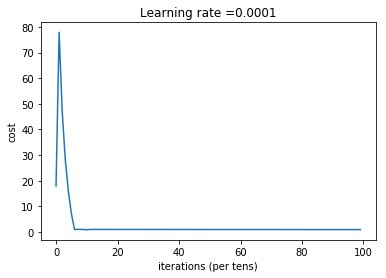

In [113]:
from IPython.display import Image
Image(r"C:\Users\jorda\Downloads\code_1.png")


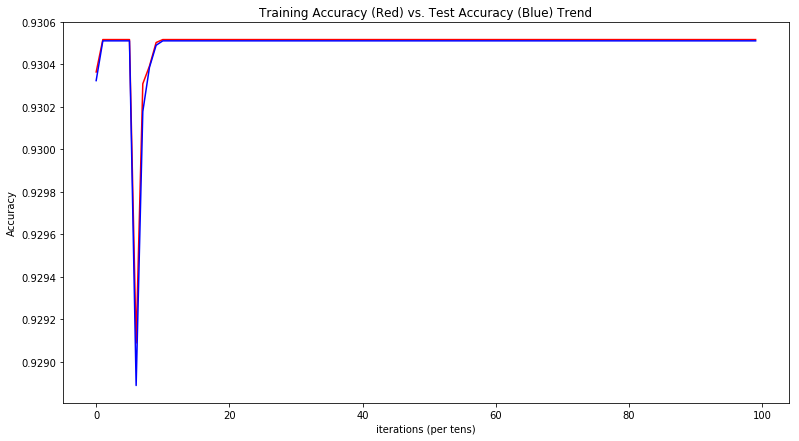

In [115]:
from IPython.display import Image
Image(r"C:\Users\jorda\Downloads\code_2.png")
